In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline
import sklearn
import seaborn as sns

In [4]:
df=pd.read_csv('C:/Users/AL - ELMIA/Desktop/USA/USA_Housing.csv')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg. Area Income,5000.0,6.858311e+04,10657.991214,17796.631190,61480.562388,6.880429e+04,7.578334e+04,1.077017e+05
Avg. Area House Age,5000.0,5.977222e+00,0.991456,2.644304,5.322283,5.970429e+00,6.650808e+00,9.519088e+00
Avg. Area Number of Rooms,5000.0,6.987792e+00,1.005833,3.236194,6.299250,7.002902e+00,7.665871e+00,1.075959e+01
Avg. Area Number of Bedrooms,5000.0,3.981330e+00,1.234137,2.000000,3.140000,4.050000e+00,4.490000e+00,6.500000e+00
Area Population,5000.0,3.616352e+04,9925.650114,172.610686,29403.928702,3.619941e+04,4.286129e+04,6.962171e+04
Price,5000.0,1.232073e+06,353117.626581,15938.657923,997577.135049,1.232669e+06,1.471210e+06,2.469066e+06


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [8]:
df.shape

(5000, 7)

In [9]:
df.isna().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

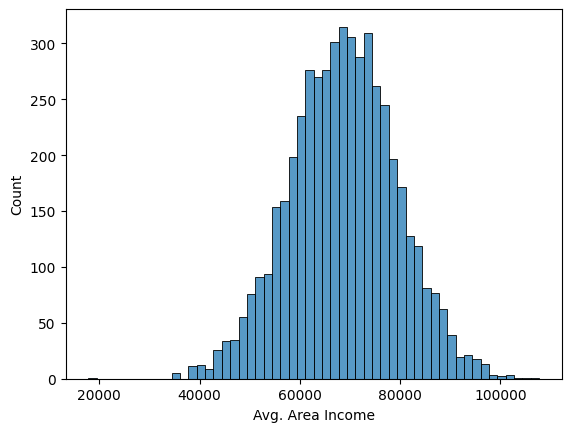

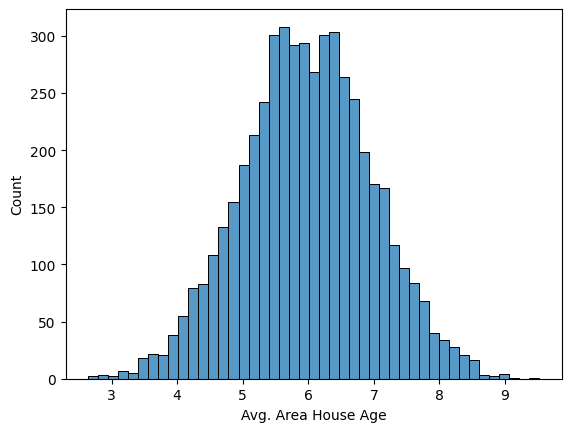

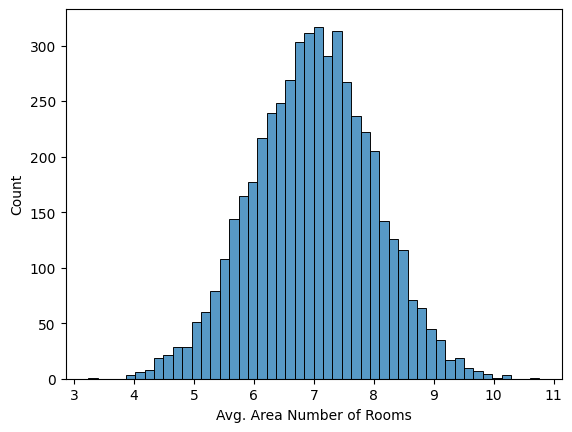

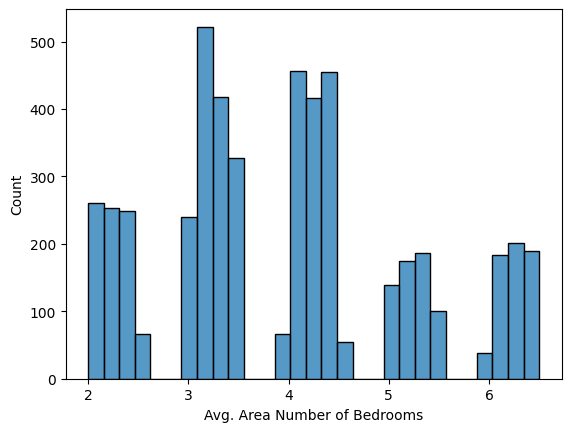

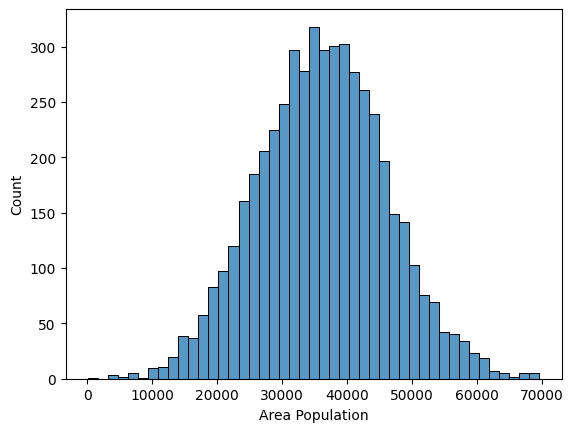

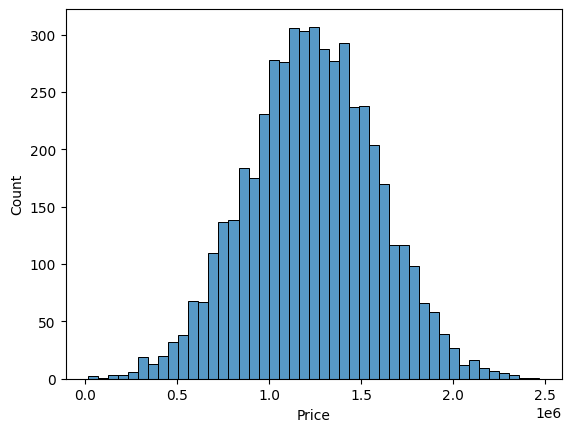

In [11]:
for i in df.select_dtypes(include='number').columns:
    sns.histplot(data=df,x=i)
    plt.show()

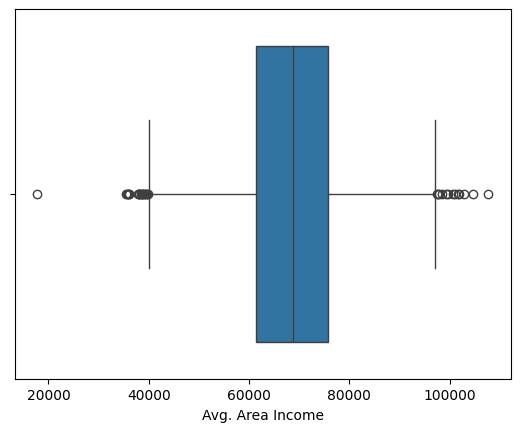

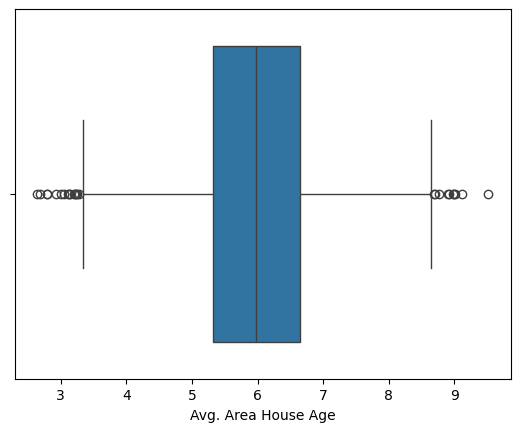

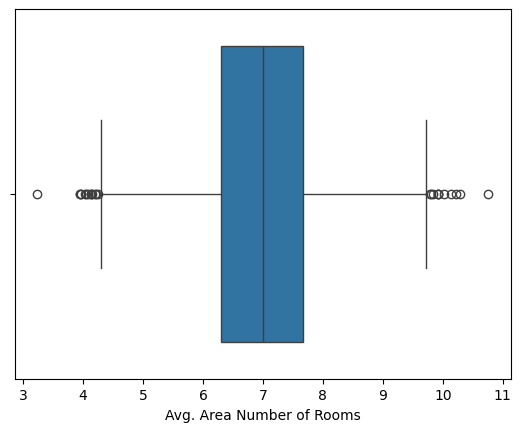

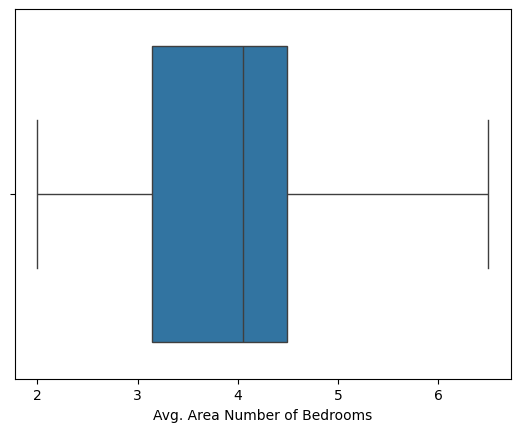

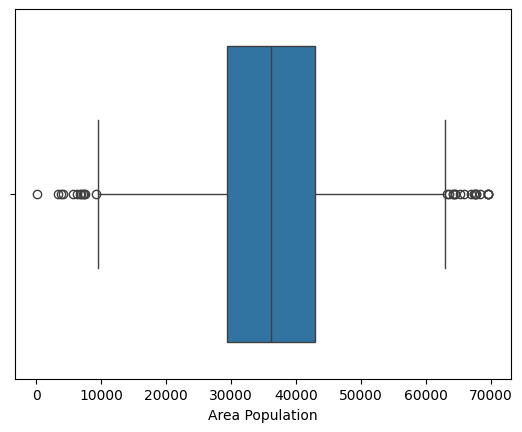

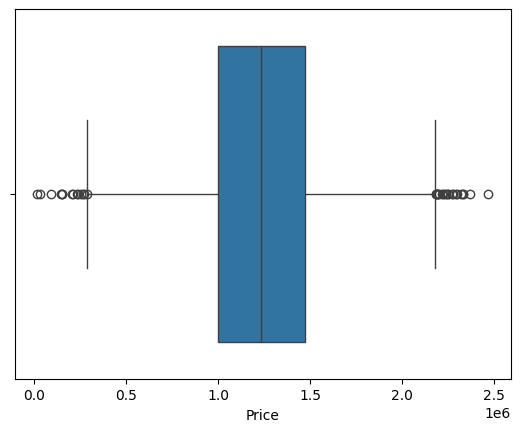

In [12]:
for i in df.select_dtypes(include='number').columns:
    sns.boxplot(data=df,x=i)
    plt.show()

In [13]:
df.select_dtypes(include='number').columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

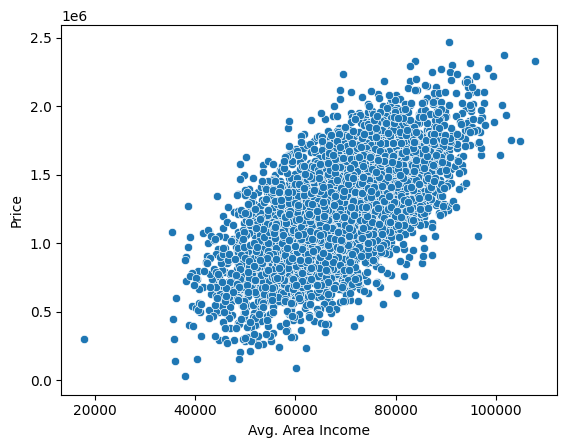

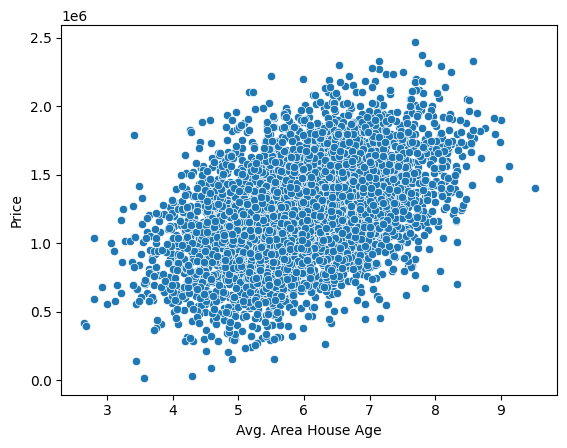

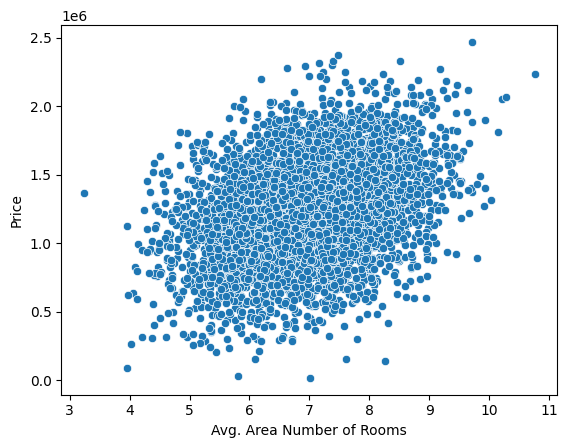

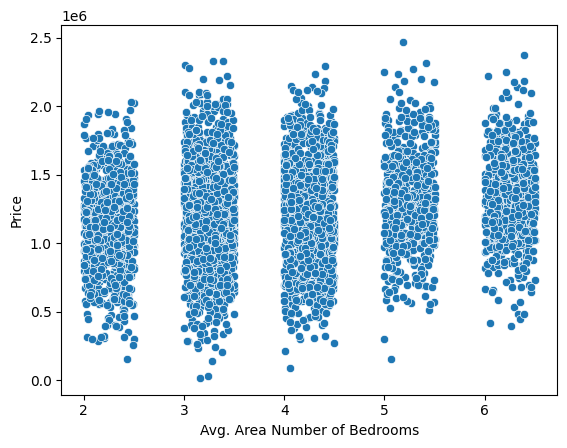

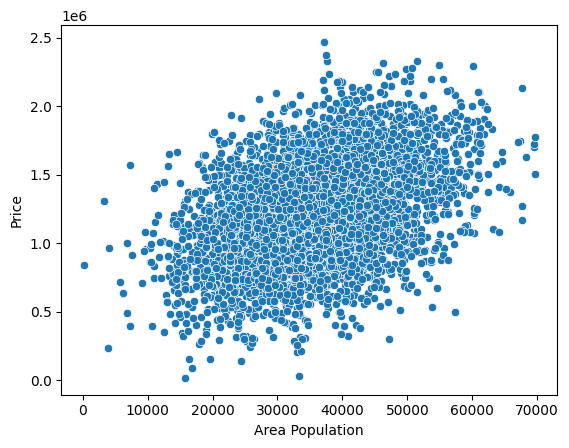

In [15]:
for i in ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population'] :
    sns.scatterplot(data=df,x=i ,y='Price')
    plt.show()

<Figure size 1200x1000 with 0 Axes>

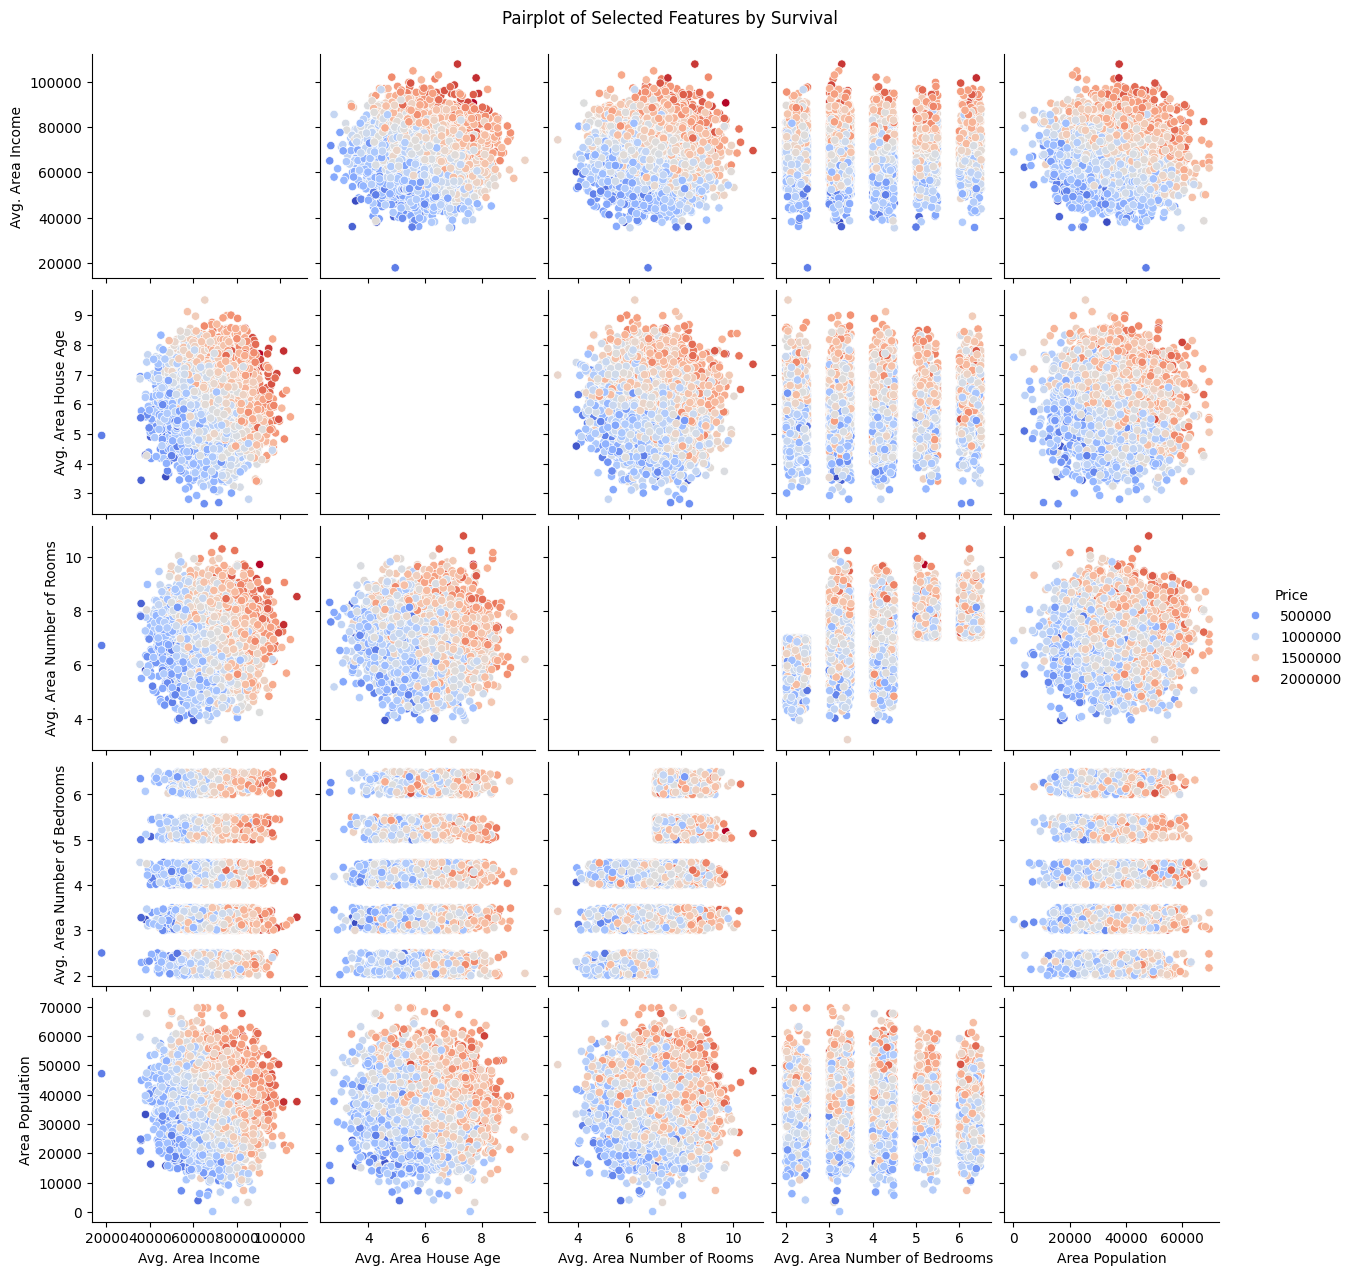

In [16]:
plt.figure(figsize=(12, 10))
sns.pairplot(df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price']], hue='Price', palette='coolwarm')
plt.suptitle('Pairplot of Selected Features by Survival', y=1.02)
plt.show()

In [18]:
s=df.select_dtypes(include='number').corr()
print(s)

                              Avg. Area Income  Avg. Area House Age  \
Avg. Area Income                      1.000000            -0.002007   
Avg. Area House Age                  -0.002007             1.000000   
Avg. Area Number of Rooms            -0.011032            -0.009428   
Avg. Area Number of Bedrooms          0.019788             0.006149   
Area Population                      -0.016234            -0.018743   
Price                                 0.639734             0.452543   

                              Avg. Area Number of Rooms  \
Avg. Area Income                              -0.011032   
Avg. Area House Age                           -0.009428   
Avg. Area Number of Rooms                      1.000000   
Avg. Area Number of Bedrooms                   0.462695   
Area Population                                0.002040   
Price                                          0.335664   

                              Avg. Area Number of Bedrooms  Area Population  \
Avg. Area

<Axes: >

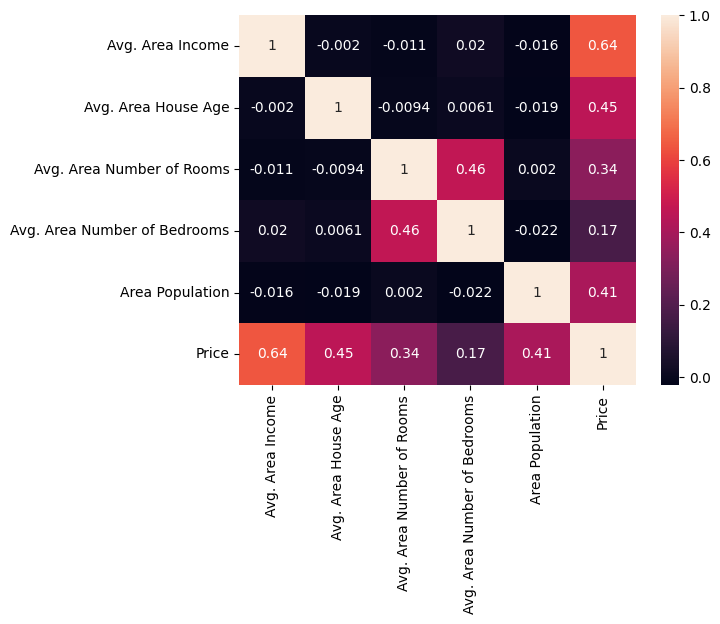

In [19]:
sns.heatmap(s,annot=True)

In [20]:
def wisker(col):
    q1,q3=np.percentile(col,[25,77])
    iqr=q3-q1
    low=q1-1.5*iqr
    upper=q3+1.5*iqr
    return low,upper

In [21]:
for i in ['Avg. Area Income', 'Avg. Area House Age', 
        'Area Population', 'Price']:
    low,upper=wisker( df[i])
    df[i]=np.where(df[i]<low ,low,df[i])
    df[i]=np.where(df[i]>upper ,upper,df[i])

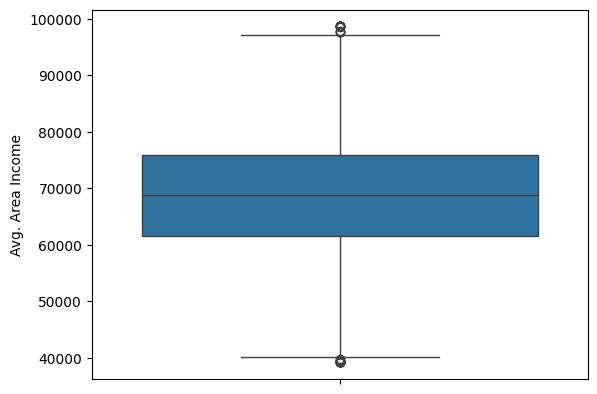

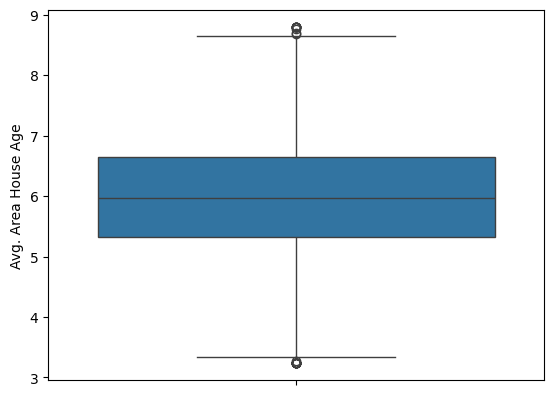

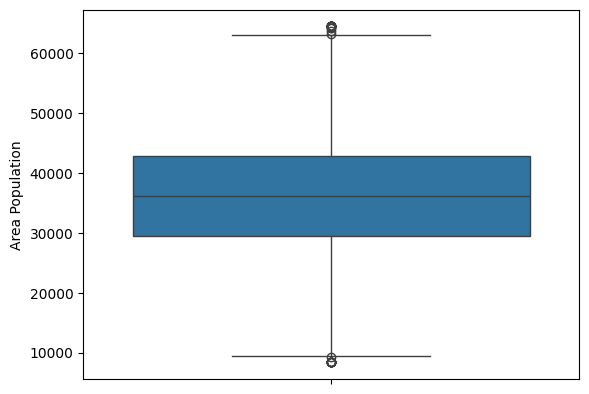

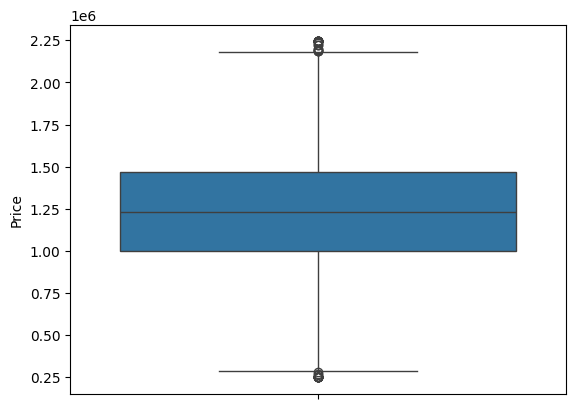

In [23]:
for i in ['Avg. Area Income', 'Avg. Area House Age', 
        'Area Population', 'Price']:
    sns.boxplot(df[i])
    plt.show()

In [36]:
df=pd.get_dummies(data=df,columns=['Address'],drop_first=True)
df = df.astype(int)
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,"Address_000 Todd Pines\nAshleyberg, KY 90207-1179","Address_001 Steve Plaza\nJessicastad, UT 25190","Address_0010 Gregory Loaf\nSouth Ericfort, VA 34651-0718","Address_00149 Raymond Knolls\nNew Jason, UT 75026",...,Address_Unit 9446 Box 0958\nDPO AE 97025,Address_Unit 9463 Box 0963\nDPO AE 49984-2796,Address_Unit 9494 Box 2307\nDPO AE 58622,Address_Unit 9664 Box 1605\nDPO AA 30902,Address_Unit 9732 Box 1846\nDPO AE 69898-3304,Address_Unit 9774 Box 4511\nDPO AE 44963,Address_Unit 9778 Box 2114\nDPO AP 59374,Address_Unit 9785 Box 0790\nDPO AP 60371-0797,Address_Unit 9831 Box 7128\nDPO AA 54705,Address_Unit 9871 Box 9037\nDPO AP 37275-9289
0,1,0,0,0,-1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,-1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,1,0,0,-1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4996,0,1,0,0,-1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,1,-2,-1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4998,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
df.select_dtypes(exclude=['number']).columns


Index([], dtype='object')

In [38]:
numerical_cols = df.select_dtypes(include=['number']).columns
numerical_cols

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price',
       'Address_000 Todd Pines\nAshleyberg, KY 90207-1179',
       'Address_001 Steve Plaza\nJessicastad, UT 25190',
       'Address_0010 Gregory Loaf\nSouth Ericfort, VA 34651-0718',
       'Address_00149 Raymond Knolls\nNew Jason, UT 75026',
       ...
       'Address_Unit 9446 Box 0958\nDPO AE 97025',
       'Address_Unit 9463 Box 0963\nDPO AE 49984-2796',
       'Address_Unit 9494 Box 2307\nDPO AE 58622',
       'Address_Unit 9664 Box 1605\nDPO AA 30902',
       'Address_Unit 9732 Box 1846\nDPO AE 69898-3304',
       'Address_Unit 9774 Box 4511\nDPO AE 44963',
       'Address_Unit 9778 Box 2114\nDPO AP 59374',
       'Address_Unit 9785 Box 0790\nDPO AP 60371-0797',
       'Address_Unit 9831 Box 7128\nDPO AA 54705',
       'Address_Unit 9871 Box 9037\nDPO AP 37275-9289'],
      dtype='object', length=5005)

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print(df.head())

   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0          1.491781            -0.007674                   0.005253   
1          1.491781            -0.007674                   0.005253   
2          0.008897            -0.007674                   1.464545   
3          0.008897             1.468073                  -1.454038   
4          0.008897            -0.007674                   0.005253   

   Avg. Area Number of Bedrooms  Area Population     Price  \
0                      -0.06004        -1.456050  0.005357   
1                      -0.06004         0.007317  0.005357   
2                      -0.06004         0.007317  0.005357   
3                      -0.06004         0.007317  0.005357   
4                      -0.06004         0.007317 -1.482733   

   Address_000 Todd Pines\nAshleyberg, KY 90207-1179  \
0                                          -0.014144   
1                                          -0.014144   
2                               

In [40]:
numerical_cols = df.select_dtypes(exclude=['number']).columns
numerical_cols

Index([], dtype='object')

In [41]:
correlation_matrix = df.corr()
high_correlation = correlation_matrix.stack().reset_index()
high_correlation.columns = ['Feature 1', 'Feature 2', 'Correlation']
high_correlation = correlation_matrix[correlation_matrix > 0.9]
print(high_correlation.columns )

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price',
       'Address_000 Todd Pines\nAshleyberg, KY 90207-1179',
       'Address_001 Steve Plaza\nJessicastad, UT 25190',
       'Address_0010 Gregory Loaf\nSouth Ericfort, VA 34651-0718',
       'Address_00149 Raymond Knolls\nNew Jason, UT 75026',
       ...
       'Address_Unit 9446 Box 0958\nDPO AE 97025',
       'Address_Unit 9463 Box 0963\nDPO AE 49984-2796',
       'Address_Unit 9494 Box 2307\nDPO AE 58622',
       'Address_Unit 9664 Box 1605\nDPO AA 30902',
       'Address_Unit 9732 Box 1846\nDPO AE 69898-3304',
       'Address_Unit 9774 Box 4511\nDPO AE 44963',
       'Address_Unit 9778 Box 2114\nDPO AP 59374',
       'Address_Unit 9785 Box 0790\nDPO AP 60371-0797',
       'Address_Unit 9831 Box 7128\nDPO AA 54705',
       'Address_Unit 9871 Box 9037\nDPO AP 37275-9289'],
      dtype='object', length=5005)


In [42]:
features = ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']
X = df[features]  
y = df['Price']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
ridge = Ridge()

In [69]:
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100],   
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']  
}

In [70]:
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga']},
             scoring='neg_mean_squared_error')

In [71]:
best_model = grid_search.best_estimator_

In [46]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = best_model.predict(X_test)


In [52]:
#results = np.column_stack((y_test, y_pred))
#for actual, predicted in results:
 #   print(f'{actual: .2f} | {predicted: .2f}')

In [74]:
from sklearn.metrics import mean_squared_error , r2_score , mean_absolute_error

In [72]:
mse_lreg = mean_squared_error(y_test, y_pred)
rmse_lreg = np.sqrt(mse_lreg)
r2_score_Ireg=r2_score(y_test, y_pred)
print('MSE  ', mse_lreg)
print('RMSE ', rmse_lreg)
print('r2_score',r2_score_Ireg)


MSE   0.4490925365571811
RMSE  0.670143668594415
r2_score 0.557056434184658


In [64]:
coef= lreg.coef_
for i,j in zip(X_train.columns ,coef):
    print(f"{i}+{j}")

Avg. Area Income+0.5136572079201824
Avg. Area House Age+0.3477053171213619
Avg. Area Number of Rooms+0.2636793576104058
Avg. Area Number of Bedrooms+0.05625874747723008
Area Population+0.3350525677495464


In [66]:
residual=y_test-y_pred
residual.mean()

np.float64(-0.013081384154322187)

In [75]:
mae_ired=mean_absolute_error(y_test,y_pred)
mse_lreg = mean_squared_error(y_test, y_pred)
rmse_lreg = np.sqrt(mse_lreg)
r2_score_Ireg=r2_score(y_test, y_pred)
print(mae_ired)
print('MSE  ', mse_lreg)
print('RMSE ', rmse_lreg)
print('r2_score',r2_score_Ireg)

0.5029374601909617
MSE   0.4490925365571811
RMSE  0.670143668594415
r2_score 0.557056434184658


In [57]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

mse_rf = mean_squared_error(y_pred_rf, y_test)
rmse_rf = np.sqrt(mse_rf)

print('MSE  ', mse_rf)
print('RMSE  ', rmse_rf)

MSE   0.45093910303879986
RMSE   0.6715199945190016


In [73]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

y_pred_rf = gbr.predict(X_test)

mse_gbr = mean_squared_error(y_pred_rf, y_test)
rmse_gbr = np.sqrt(mse_gbr)


print('MSE  ', mse_gbr)
print('RMSE  ', rmse_gbr)

MSE   0.4341998439719527
RMSE   0.6589384219879372
